In [1]:
import numpy as np
import matplotlib.pyplot as plt
from validations import shannon_entropy_gaussian, discretize_gaussian, discretize_shannon_entropy_gaussian, theoretical_renyi_entropy, generate_gaussian_samples
from renyi import Renyi_Calculator, RBF, Gram

In [2]:
%matplotlib inline

## Calculate the Shannon Entropy and Renyi Entropy

In [3]:
# Theoretical in continuous case, derived from formula
variances = np.linspace(1, 5, 20)
alpha = 1.05
# Theoretical Shannon Entropy
entropies = shannon_entropy_gaussian(variances)
# Theoretical Renyi Entropy
renyi_entropies = theoretical_renyi_entropy(variances, alpha)
# print(entropies.shape)

In [4]:
print(renyi_entropies)

[1.40684017 1.50236779 1.58253912 1.65161429 1.71229472 1.76640151
 1.81522074 1.85969449 1.9005335  1.93828728 1.97338941 2.00618805
 2.036967   2.06596062 2.09336474 2.11934461 2.14404099 2.16757474
 2.19005044 2.21155913]


In [62]:
def renyi_calc(alpha, mat_A):
    eigenvalues  = np.linalg.eigvalsh(mat_A)

    # print(eigenvalues)
    # A_alpha = np.linalg.matrix_power(mat_A, alpha)

    # trace_A_alpha = np.trace(A_alpha)
    min_eigenvalue = np.min(eigenvalues)
    if min_eigenvalue < 0:
        adjustment = abs(min_eigenvalue) + 1e-10
        A_adjusted = mat_A + adjustment * np.eye(mat_A.shape[0])
    else:
        A_adjusted = mat_A

    eigenvalues = np.linalg.eigvalsh(A_adjusted)
    
    eigenvalues[eigenvalues < 0] = 0
    # if not np.all(eigenvalues >= 0):
    #     print('Not all eigenvalues more than 0')
    # summation = np.sum(eigenvalues ** alpha)
    # S_alpha_A = (1 / (1 - alpha)) * np.log2(trace_A_alpha)
    # print(f'eigenvalues:{eigenvalues.shape}')
    S_alpha_A = 1/ (1 - alpha) * np.log2(np.sum(eigenvalues**alpha))
    # val = np.log2(np.sum(eigenvalues**alpha))
    # val = eigenvalues ** alpha
    # print(f'value:{val[900:1000]}')
    # return S_alpha_A
    return S_alpha_A

In [5]:
calc_renyi_entropy = []
alpha = 1.05
mean = 0
num_samples = 1000
for variance in variances:
    samples = generate_gaussian_samples(mean, variance, num_samples)
    expand_samples = samples[:, np.newaxis]
    dist = RBF(expand_samples, 2)
    gram_dist = Gram(dist)
    renyi_calc = Renyi_Calculator('entropy', alpha, gram_dist)
    # renyi_entropy_value = renyi_calc(alpha, gram_dist)
    calc_renyi_entropy.append(renyi_calc.fit())
calc_renyi_entropy = np.array(calc_renyi_entropy)
print(calc_renyi_entropy)

[0.75063345 0.8793446  0.92022523 1.01807708 1.05195077 1.13874706
 1.18033548 1.22586685 1.29390718 1.2971372  1.4292474  1.39196131
 1.41932226 1.49419232 1.51693508 1.50505477 1.56983723 1.65276709
 1.60511644 1.66045566]


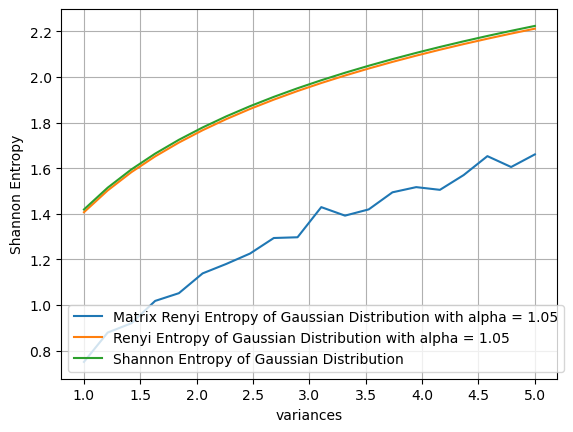

In [6]:
plt.plot(variances, calc_renyi_entropy, label = f'Matrix Renyi Entropy of Gaussian Distribution with alpha = {alpha}')
plt.plot(variances, renyi_entropies, label = f'Renyi Entropy of Gaussian Distribution with alpha = {alpha}')
plt.plot(variances, entropies, label = 'Shannon Entropy of Gaussian Distribution')
plt.xlabel('variances')
plt.ylabel('Shannon Entropy')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
mean = 0
alpha = 0.9
variance = 1
num_samples = 1000
samples = generate_gaussian_samples(mean, variance, num_samples)
expand_samples = samples[:, np.newaxis]
dist = RBF(expand_samples, 2)
# print(dist)
gram_dist = Gram(dist)
# print(gram_dist[0:5, 0:5])
# print(np.trace(gram_dist))
# print(np.linalg.eigvals(gram_dist))
# print(gram_dist[2, 0:10])
renyi_entropy_value = renyi_calc(alpha, gram_dist)
# renyi_calc = Renyi_Calculator('entropy', alpha, gram_dist)
# renyi_entropy_val = renyi_calc.fit()
# print(renyi_entropy_val)
# print(gram_dist)
# print(samples.shape)
# RBF(, 2)
# print(samples.shape)
# samples[:,np.newaxis].shape)

In [32]:
# print(discrete_entropy)

In [33]:
# plt.plot(variances, discrete_entropy, label = 'Discrete Shannon Entropy of Gaussian Distribution')


## Calculate the Renyi Entropy